In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm
import glob

from pyEulerCurves.distance_utils import difference_ECP
from pyEulerCurves.velocity import compute_local_contributions

from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import os
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

In [2]:
def save_dendrogram(
    matrix,
    labels,
    title,
    output_folder,
    jpg_name,
    orientation="right",
    method="ward",
    width=8,
    height=5,
    show=False,
    save_jpg=True,
):
    """
    Draws a dendrogram based on either a distance matrix or a feature matrix.

    Parameters
    ----------
    matrix : np.ndarray
        Either a square distance matrix or a rectangular feature matrix.
    labels : list[str]
        Labels for the objects.
    title : str
        Title of the dendrogram.
    orientation : str, optional
        Dendrogram orientation (default: 'right').
    width : float, optional
        Width of the figure in inches.
    height : float, optional
        Height of the figure in inches.
    show : bool, optional
        Whether to display the plot.
    save_jpg : bool, optional
        Whether to save the plot as a JPG file.
    """

    # Identify type of matrix
    if matrix.shape[0] == matrix.shape[1]:
        if np.allclose(matrix, matrix.T, atol=1e-10) and np.all(np.diag(matrix) == 0):
            print("Using distance matrix (squareform applied).")
            condensed_matrix = squareform(matrix)
        else:
            print("Using feature matrix (pdist computed from square input).")
            condensed_matrix = pdist(matrix, metric="euclidean")
    else:
        print("Using feature matrix (pdist computed).")
        condensed_matrix = pdist(matrix, metric="euclidean")

    # Hierarchical clustering
    Z = linkage(condensed_matrix, method=method)

    # Plot dendrogram
    fig, ax = plt.subplots(figsize=(width, height))
    dendrogram(Z, labels=labels, orientation=orientation, ax=ax)
    ax.set_title(title)
    plt.tight_layout()
    plt.xlim(left=-0.05)

    if save_jpg:
        file_path = os.path.join(output_folder, f"{jpg_name}.jpg")
        plt.savefig(file_path, format="jpg", dpi=300)

    if show:
        plt.show()

    plt.close(fig)


def process_csv(file_path):
    df = pd.read_csv(file_path)
    position_columns = [col for col in df.columns if col.startswith("s_")]
    positions = df[position_columns].to_numpy()

    velocity_columns = [col for col in df.columns if col.startswith("v_")]
    velocities = df[velocity_columns].to_numpy()

    return positions, velocities

In [3]:
import numpy as np
import pandas as pd
import os

os.makedirs("data2", exist_ok=True)

num_sets = 5
num_rows = 50
num_cols = 100

for i in range(num_sets):
    # s_data = np.random.rand(num_rows, num_cols)
    # v_data = np.random.rand(num_rows, num_cols)
    s_data = np.random.uniform(-10, 10, (num_rows, num_cols))
    v_data = np.random.uniform(-10, 10, (num_rows, num_cols))

    s_cols = [f"s_{j}" for j in range(num_cols)]
    v_cols = [f"v_{j}" for j in range(num_cols)]

    df = pd.DataFrame(np.hstack([s_data, v_data]), columns=s_cols + v_cols)

    file_path = f"data2/testset_{i}_velo1.csv"
    df.to_csv(file_path, index=False)

    print(f"Saved: {file_path}")

for i in range(num_sets):
    # s_data = np.random.rand(num_rows, num_cols)
    # v_data = np.random.rand(num_rows, num_cols)
    s_data = np.random.uniform(-10, 10, (num_rows, num_cols))
    v_data = np.random.uniform(-10, 10, (num_rows, num_cols))

    s_cols = [f"s_{j}" for j in range(num_cols)]
    v_cols = [f"v_{j}" for j in range(num_cols)]

    df = pd.DataFrame(np.hstack([s_data, v_data]), columns=s_cols + v_cols)

    file_path = f"data2/testset_{i}_velo2.csv"
    df.to_csv(file_path, index=False)

    print(f"Saved: {file_path}")

Saved: data2/testset_0_velo1.csv
Saved: data2/testset_1_velo1.csv
Saved: data2/testset_2_velo1.csv
Saved: data2/testset_3_velo1.csv
Saved: data2/testset_4_velo1.csv
Saved: data2/testset_0_velo2.csv
Saved: data2/testset_1_velo2.csv
Saved: data2/testset_2_velo2.csv
Saved: data2/testset_3_velo2.csv
Saved: data2/testset_4_velo2.csv


Found uniform CSV files:
data2/testset_0_velo1.csv
data2/testset_1_velo1.csv
data2/testset_2_velo1.csv
data2/testset_4_velo1.csv
data2/testset_3_velo1.csv

Found variable CSV files:
data2/testset_0_velo2.csv
data2/testset_1_velo2.csv
data2/testset_2_velo2.csv
data2/testset_4_velo2.csv
data2/testset_3_velo2.csv
Epsilon = 73.24176198624299


100%|██████████| 50/50 [00:00<00:00, 2118.57it/s]0<?, ?it/s]


neighbors (global indices): [1, 9, 11, 12, 13, 17, 24, 35, 44, 47]

 vertex filtrations : [[0.81542768 0.85356966]
 [0.93893686 1.00577631]
 [0.78395828 1.1089074 ]
 [0.80532626 0.98040846]
 [0.84351195 0.92977841]
 [0.83266683 0.90179599]
 [0.93924261 1.00805684]
 [0.95642864 0.9678442 ]
 [0.88567328 0.9084029 ]
 [0.81542768 0.85356966]
 [0.87301044 0.97577808]]
######Change of ECC at level (1.001741254009492, 1.0057763094365288) by -1
######Change of ECC at level (0.8518237976853169, 1.1089073960860176) by -1
######Change of ECC at level (0.9440654601286318, 1.0570266469452914) by -1
######Change of ECC at level (0.9784811922484958, 1.0316648783748483) by -1
######Change of ECC at level (0.8326668317872035, 0.901795986269784) by -1
######Change of ECC at level (0.9501995834565391, 1.0981084390978086) by -1
######Change of ECC at level (0.9564286393872277, 0.9678442026527359) by -1
######Change of ECC at level (0.8878782233956423, 0.9084029026943716) by -1
######Change of ECC at level

100%|██████████| 50/50 [00:00<00:00, 2558.06it/s]


neighbors (global indices): [1, 10]

 vertex filtrations : [[0.94661233 1.04744237]
 [0.85380822 0.89923588]
 [0.80329089 0.85378612]]
######Change of ECC at level (0.9466123285745862, 1.0474423701335525) by -1
######Change of ECC at level (1.0068142503412802, 1.0870083404434225) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9466123285745862, 1.0474423701335525)
[[0, 2]] --> (1.0068142503412802, 1.0870083404434225)
common_neighs: [[2], [1]]
Adding new simplex : [0, 1, 2]
#####Change of ECC at level (1.0068142503412802, 1.0870083404434225) by 1
Adding new simplex : [0, 2, 1]
#####Change of ECC at level (1.0068142503412802, 1.0870083404434225) by 1
neighbors (global indices): [0, 10, 11]

 vertex filtrations : [[0.85380822 0.89923588]
 [0.94661233 1.04744237]
 [0.80329089 0.85378612]
 [0.85380822 0.9669607 ]]
######Change of ECC at level (0.9466123285745862, 1.0474423701335525) by -1
######Change of ECC at level (0.8852515594862842, 0.8992358826022142) by -1
######Change of ECC 

neighbors (global indices): [8]

 vertex filtrations : [[0.81096842 0.96831962]
 [0.81096842 0.96831962]]
######Change of ECC at level (0.8109684179023344, 0.9683196237900619) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.8109684179023344, 0.9683196237900619)
common_neighs: [[]]
neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
common_neighs: []
neighbors (global indices): [20, 35, 36, 44]

 vertex filtrations : [[0.75078177 0.95469159]
 [0.75078177 0.95469159]
 [0.78946281 0.93869454]
 [0.81052144 0.85274222]
 [0.94882238 1.07819586]]
######Change of ECC at level (0.7507817746208489, 0.9546915920642045) by -1
######Change of ECC at level (0.8700274893316885, 1.0012617289210626) by -1
######Change of ECC at level (0.9492861525921461, 0.9626963667781452) by -1
######Change of ECC at level (0.9488223832291767, 1.0781958622209684) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.7507817746208489, 0.9546915920642045)
[[0, 2]] --

100%|██████████| 50/50 [00:00<00:00, 2387.88it/s]



 vertex filtrations : [[0.77543814 0.92275354]
 [0.77543814 0.94650614]
 [0.71433161 0.95014542]
 [0.78946281 0.93869454]
 [0.81052144 0.85274222]
 [0.91081597 0.92275354]]
######Change of ECC at level (0.775438136554693, 0.9465061402023239) by -1
######Change of ECC at level (0.9091923676240978, 0.96598451119771) by -1
######Change of ECC at level (0.8301330877391574, 0.9386945360259934) by -1
######Change of ECC at level (0.9106656704044105, 0.9797165631774595) by -1
######Change of ECC at level (0.9197691336771063, 0.9227535412555757) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.775438136554693, 0.9465061402023239)
[[0, 2]] --> (0.9091923676240978, 0.96598451119771)
[[0, 3]] --> (0.8301330877391574, 0.9386945360259934)
[[0, 4]] --> (0.9106656704044105, 0.9797165631774595)
[[0, 5]] --> (0.9197691336771063, 0.9227535412555757)
common_neighs: [[2], [1, 4], [], [2, 5], [4]]
Adding new simplex : [0, 1, 2]
#####Change of ECC at level (0.9513362692601731, 1.005725083035778) by 1

Processing CSV files:  40%|████      | 4/10 [00:00<00:00, 31.36it/s]

neighbors (global indices): [10, 30]

 vertex filtrations : [[0.8979098  0.93617912]
 [0.89128089 1.00678291]
 [0.77940241 0.91698566]]
######Change of ECC at level (1.013729924006614, 1.1272596132156292) by -1
######Change of ECC at level (0.8979097992384251, 0.9361791233228292) by -1
simplices_in_current_dimension :
[[0, 1]] --> (1.013729924006614, 1.1272596132156292)
[[0, 2]] --> (0.8979097992384251, 0.9361791233228292)
common_neighs: [[], []]
neighbors (global indices): [14, 48]

 vertex filtrations : [[0.88671806 1.06323031]
 [0.84215018 0.87936019]
 [1.01397175 1.05920489]]
######Change of ECC at level (0.8867180589312303, 1.0859840371447433) by -1
######Change of ECC at level (1.0139717540529425, 1.0632303058726709) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.8867180589312303, 1.0859840371447433)
[[0, 2]] --> (1.0139717540529425, 1.0632303058726709)
common_neighs: [[2], [1]]
Adding new simplex : [0, 1, 2]
#####Change of ECC at level (1.0382483698517588, 1.190204058591

neighbors (global indices): [16, 25, 26, 29, 39, 43, 44, 47]

 vertex filtrations : [[0.8762517  0.96345661]
 [0.71753204 0.93773247]
 [0.80656415 0.97778545]
 [0.98305483 1.04383993]
 [0.80632359 0.97886387]
 [0.82476397 1.00373481]
 [0.88996831 0.96345661]
 [0.83577896 0.9232514 ]
 [0.77572907 0.92616095]]
######Change of ECC at level (0.9357361227743216, 1.053290389055025) by -1
######Change of ECC at level (0.876251703393439, 0.9777854546956224) by -1
######Change of ECC at level (1.0150008297119475, 1.0438399347985008) by -1
######Change of ECC at level (0.9047936005932107, 0.9886316633925853) by -1
######Change of ECC at level (1.028083211821383, 1.1173232721860011) by -1
######Change of ECC at level (0.8899683099726948, 0.9634566074997762) by -1
######Change of ECC at level (1.0860726410764463, 1.0878579781486168) by -1
######Change of ECC at level (0.903752535559091, 1.0156414990259128) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9357361227743216, 1.053290389055025)


100%|██████████| 50/50 [00:00<00:00, 1252.55it/s]


neighbors (global indices): [27, 31]

 vertex filtrations : [[0.85354544 0.96773609]
 [0.85354544 0.9682983 ]
 [0.8807569  0.96773609]]
######Change of ECC at level (0.8535454351929611, 1.0325977857963995) by -1
######Change of ECC at level (0.9491679510314579, 0.9677360948923684) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.8535454351929611, 1.0325977857963995)
[[0, 2]] --> (0.9491679510314579, 0.9677360948923684)
common_neighs: [[], []]
neighbors (global indices): [7, 28, 47]

 vertex filtrations : [[0.88268569 0.95374777]
 [0.68471173 0.88225588]
 [0.8807569  0.97127851]
 [0.77572907 0.92616095]]
######Change of ECC at level (0.9356903091083636, 1.0233708666345378) by -1
######Change of ECC at level (0.9493470048279377, 1.0687784601295807) by -1
######Change of ECC at level (0.882685687443911, 0.9537477713257546) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9356903091083636, 1.0233708666345378)
[[0, 2]] --> (0.9493470048279377, 1.0687784601295807)
[[0, 3]] --> (0

neighbors (global indices): [8, 44]

 vertex filtrations : [[0.87460813 0.93970325]
 [0.8152243  0.94202556]
 [0.89970358 0.93970325]]
######Change of ECC at level (0.874608127723928, 0.9420255616095674) by -1
######Change of ECC at level (0.8997035783199641, 0.9397032515456949) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.874608127723928, 0.9420255616095674)
[[0, 2]] --> (0.8997035783199641, 0.9397032515456949)
common_neighs: [[], []]
neighbors (global indices): [4, 49]

 vertex filtrations : [[0.85953231 0.90741619]
 [0.86229707 0.98959864]
 [0.75536266 0.90105001]]
######Change of ECC at level (0.8622970745703276, 0.9895986449754417) by -1
######Change of ECC at level (0.8595323138033697, 0.9074161886795135) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.8622970745703276, 0.9895986449754417)
[[0, 2]] --> (0.8595323138033697, 0.9074161886795135)
common_neighs: [[], []]
neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
c

100%|██████████| 50/50 [00:00<00:00, 1282.12it/s]



 vertex filtrations : [[0.92234287 1.08548939]
 [0.823676   1.00381799]
 [0.89013675 1.03856195]]
######Change of ECC at level (0.9649400856561978, 1.2528164198744465) by -1
######Change of ECC at level (0.9223428710528455, 1.085489385231831) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9649400856561978, 1.2528164198744465)
[[0, 2]] --> (0.9223428710528455, 1.085489385231831)
common_neighs: [[2], [1]]
Adding new simplex : [0, 1, 2]
#####Change of ECC at level (0.9649400856561978, 1.2528164198744465) by 1
Adding new simplex : [0, 2, 1]
#####Change of ECC at level (0.9649400856561978, 1.2528164198744465) by 1
neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
common_neighs: []
neighbors (global indices): [6, 7, 8, 32, 41, 45]

 vertex filtrations : [[0.89013675 1.03856195]
 [0.98526551 1.16182908]
 [0.83223087 0.85668929]
 [0.8152243  0.94202556]
 [0.823676   1.00381799]
 [0.92234287 1.08548939]
 [0.82879238 0.9920018 ]]
######Chan

neighbors (global indices): [11, 39]

 vertex filtrations : [[0.89522398 0.96497237]
 [0.76499834 0.86855542]
 [0.89522398 0.96167983]]
######Change of ECC at level (0.9205152290583271, 0.9649723706492552) by -1
######Change of ECC at level (0.8952239768260626, 1.045697444059857) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9205152290583271, 0.9649723706492552)
[[0, 2]] --> (0.8952239768260626, 1.045697444059857)
common_neighs: [[], []]
neighbors (global indices): [22, 26, 29, 47]

 vertex filtrations : [[0.79233699 0.92415622]
 [0.86485817 0.92432584]
 [0.92331347 0.98852529]
 [0.92080852 0.93511162]
 [0.79233699 0.92415622]]
######Change of ECC at level (0.984606678930222, 1.0183392281707913) by -1
######Change of ECC at level (0.9233134661741922, 0.9885252912858581) by -1
######Change of ECC at level (0.9320366719320614, 0.9351116242054136) by -1
######Change of ECC at level (0.7923369914391445, 0.9241562249790936) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.984

100%|██████████| 50/50 [00:00<00:00, 2224.20it/s]



 vertex filtrations : [[0.90753588 0.97936359]
 [0.90517204 0.99348499]
 [0.92080852 0.93511162]
 [0.81598511 0.89909607]]
######Change of ECC at level (0.9253009969766552, 0.9934849892283767) by -1
######Change of ECC at level (0.9208085245116728, 1.0016856556596763) by -1
######Change of ECC at level (0.9075358818682154, 0.979363593124593) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9253009969766552, 0.9934849892283767)
[[0, 2]] --> (0.9208085245116728, 1.0016856556596763)
[[0, 3]] --> (0.9075358818682154, 0.979363593124593)
common_neighs: [[], [], []]
neighbors (global indices): [4, 15]

 vertex filtrations : [[0.92588734 1.04275433]
 [0.7171482  0.98764883]
 [0.9287905  0.96662359]]
######Change of ECC at level (0.9258873417022353, 1.042754326241538) by -1
######Change of ECC at level (1.05486918863968, 1.0724437143859502) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9258873417022353, 1.042754326241538)
[[0, 2]] --> (1.05486918863968, 1.0724437143859502)
commo

neighbors (global indices): [12, 34, 42]

 vertex filtrations : [[0.76109422 1.05960171]
 [0.76109422 0.88769256]
 [1.01367316 1.05960171]
 [0.82575552 0.89887156]]
######Change of ECC at level (0.7610942242124626, 1.0958054394878676) by -1
######Change of ECC at level (1.0136731637471, 1.0596017099652282) by -1
######Change of ECC at level (0.9728102666242626, 1.090162099788897) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.7610942242124626, 1.0958054394878676)
[[0, 2]] --> (1.0136731637471, 1.0596017099652282)
[[0, 3]] --> (0.9728102666242626, 1.090162099788897)
common_neighs: [[3], [], [1]]
Adding new simplex : [0, 1, 3]
#####Change of ECC at level (0.9728102666242626, 1.0958054394878676) by 1
Adding new simplex : [0, 3, 1]
#####Change of ECC at level (0.9728102666242626, 1.0958054394878676) by 1
neighbors (global indices): [12, 22, 29, 37]

 vertex filtrations : [[0.80950429 0.88769256]
 [0.76109422 0.88769256]
 [0.96761333 1.00870766]
 [0.81808209 0.92854072]
 [0.89252221

100%|██████████| 50/50 [00:00<00:00, 2566.86it/s]


 vertex filtrations : [[0.86166928 0.9850394 ]
 [0.86166928 1.01815529]
 [0.92888934 0.98826726]
 [0.82575552 0.89887156]]
######Change of ECC at level (0.8616692811468754, 1.018155286721119) by -1
######Change of ECC at level (0.9288893409921327, 0.9882672570014511) by -1
######Change of ECC at level (0.8754906971375083, 0.9850394046252677) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.8616692811468754, 1.018155286721119)
[[0, 2]] --> (0.9288893409921327, 0.9882672570014511)
[[0, 3]] --> (0.8754906971375083, 0.9850394046252677)
common_neighs: [[3], [], [1]]
Adding new simplex : [0, 1, 3]
#####Change of ECC at level (1.0926646840081848, 1.132364611934854) by 1
Adding new simplex : [0, 3, 1]
#####Change of ECC at level (1.0926646840081848, 1.132364611934854) by 1
neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
common_neighs: []
neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
commo


Processing CSV files:  80%|████████  | 8/10 [00:00<00:00, 26.57it/s]

neighbors (global indices): [17, 47, 48]

 vertex filtrations : [[0.93797962 0.96156105]
 [0.8716048  0.93410402]
 [0.87048886 0.97275645]
 [0.88074403 0.91792376]]
######Change of ECC at level (0.9610080781650975, 0.9615610454515395) by -1
######Change of ECC at level (0.937979622139943, 0.9737517502442778) by -1
######Change of ECC at level (1.0215929081956114, 1.0376882909120182) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9610080781650975, 0.9615610454515395)
[[0, 2]] --> (0.937979622139943, 0.9737517502442778)
[[0, 3]] --> (1.0215929081956114, 1.0376882909120182)
common_neighs: [[], [], []]
neighbors (global indices): [2, 4, 16, 28, 44]

 vertex filtrations : [[0.82275857 0.90825895]
 [0.86876461 0.90562176]
 [0.80490318 0.91271275]
 [0.82660316 0.88600447]
 [0.82549018 0.89904283]
 [0.86876461 0.90562176]]
######Change of ECC at level (0.9207727954842524, 0.9872863431702026) by -1
######Change of ECC at level (0.8227585731091389, 0.9127127481871644) by -1
######Change 

100%|██████████| 50/50 [00:00<00:00, 1811.54it/s]



 vertex filtrations : [[0.80490318 0.96037936]
 [0.80490318 0.91271275]
 [0.86020988 1.09384984]
 [0.82660316 0.88600447]
 [0.82549018 0.89904283]
 [0.82549018 0.94847678]
 [0.87048886 0.97275645]
 [0.88074403 0.91792376]
 [0.82106795 0.97613587]]
######Change of ECC at level (0.804903175739558, 0.9668312184811337) by -1
######Change of ECC at level (1.0478980987762074, 1.0938498395649296) by -1
######Change of ECC at level (0.8368533623320576, 0.9603793634893749) by -1
######Change of ECC at level (0.9569028431105135, 1.0403726128406747) by -1
######Change of ECC at level (0.9140838169645331, 0.984054432686264) by -1
######Change of ECC at level (1.0204111799584197, 1.1341241665410753) by -1
######Change of ECC at level (1.0560616103486147, 1.1269054299135068) by -1
######Change of ECC at level (0.866090950722852, 1.0948633107442896) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.804903175739558, 0.9668312184811337)
[[0, 2]] --> (1.0478980987762074, 1.0938498395649296)
[[0, 3

neighbors (global indices): [22, 29, 49]

 vertex filtrations : [[0.80558748 0.93389631]
 [0.80558748 0.93389631]
 [0.91199383 0.95058951]
 [0.80867256 0.93016766]]
######Change of ECC at level (0.8055874848673326, 0.9338963123254324) by -1
######Change of ECC at level (0.9119938256453617, 0.9505895089886935) by -1
######Change of ECC at level (0.9978189517436181, 1.1526501392247432) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.8055874848673326, 0.9338963123254324)
[[0, 2]] --> (0.9119938256453617, 0.9505895089886935)
[[0, 3]] --> (0.9978189517436181, 1.1526501392247432)
common_neighs: [[3], [], [1]]
Adding new simplex : [0, 1, 3]
#####Change of ECC at level (0.9978189517436181, 1.1526501392247432) by 1
Adding new simplex : [0, 3, 1]
#####Change of ECC at level (0.9978189517436181, 1.1526501392247432) by 1
neighbors (global indices): [9, 18, 29, 32, 40, 42]

 vertex filtrations : [[0.92780065 0.99033321]
 [0.83942665 0.86405641]
 [0.84368348 0.99871903]
 [0.91199383 0.9505895

Processing CSV files: 100%|██████████| 10/10 [00:00<00:00, 27.10it/s]


neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
common_neighs: []
neighbors (global indices): []

 vertex filtrations : [[1. 1.]]
simplices_in_current_dimension :
common_neighs: []
neighbors (global indices): [9, 32]

 vertex filtrations : [[1.11802498 1.1268251 ]
 [0.83942665 0.86405641]
 [0.88311135 1.00498135]]
######Change of ECC at level (1.1480898400868678, 1.1788839945160543) by -1
######Change of ECC at level (1.1180249788839467, 1.1268251016208) by -1
simplices_in_current_dimension :
[[0, 1]] --> (1.1480898400868678, 1.1788839945160543)
[[0, 2]] --> (1.1180249788839467, 1.1268251016208)
common_neighs: [[], []]
neighbors (global indices): [41]

 vertex filtrations : [[0.93771235 0.97470425]
 [0.85768334 0.95013314]]
######Change of ECC at level (0.9377123545848721, 0.9747042533714996) by -1
simplices_in_current_dimension :
[[0, 1]] --> (0.9377123545848721, 0.9747042533714996)
common_neighs: [[]]
neighbors (global indices): [0, 10

Distance matrix: 100%|██████████| 10/10 [00:00<00:00, 20.53it/s]


ECP difference matrix (after discretization):
[[   0.         3214.37640275 3396.60598315 3541.2851961  3385.78193938
  1180.37240964 1611.61860928 3241.42362073  191.80991795 2250.88989806]
 [3214.37640275    0.          193.07499841  342.28279728  202.85221661
  2110.38391868 1608.4980316    39.96996553 3063.26389266  975.17668818]
 [3396.60598315  193.07499841    0.          187.15615021   50.55728601
  2278.55548947 1795.31605747  182.11682171 3236.35612599 1156.89885467]
 [3541.2851961   342.28279728  187.15615021    0.          212.71825365
  2437.67198835 1936.09598186  344.27348292 3383.38472442 1304.25088833]
 [3385.78193938  202.85221661   50.55728601  212.71825365    0.
  2267.56983179 1787.42410256  212.75572927 3234.20675244 1142.64308456]
 [1180.37240964 2110.38391868 2278.55548947 2437.67198835 2267.56983179
     0.          544.79313077 2127.17049216 1027.48779635 1173.70170137]
 [1611.61860928 1608.4980316  1795.31605747 1936.09598186 1787.42410256
   544.79313077    

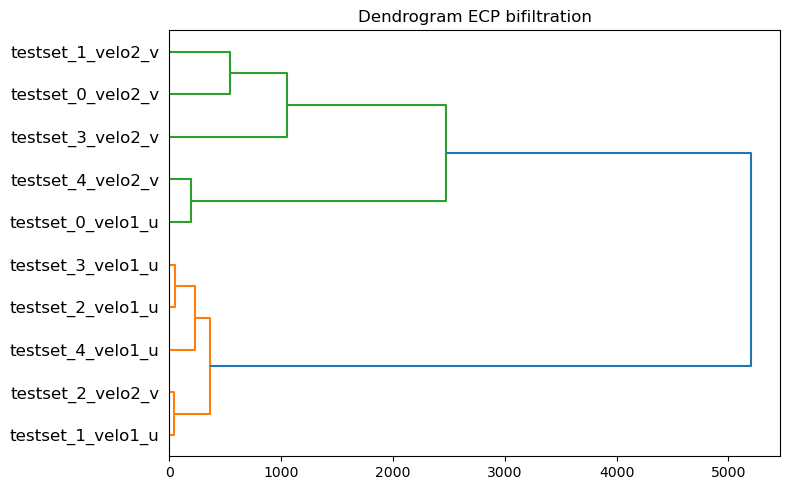

In [4]:
output_folder = "ECP_for_gen_03122025"
os.makedirs(output_folder, exist_ok=True)

dims = (
    (-10.0, 10.0),
    (-10.0, 10.0),
)  # Bifiltration domain: (x_min, x_max), (y_min, y_max)
res = 100  # Discretization grid resolution
# EPSILON = 3.5                          # Local neighborhood radius

names = []

# csv_files_uni = glob.glob("data/20251203_uniform_transition_rates/*_velo.csv")
# csv_files_var = glob.glob("data/20251203_variable_transition_rates/*_velo.csv")
csv_files_uni = glob.glob("data2/*_velo1.csv")
csv_files_var = glob.glob("data2/*_velo2.csv")

print("Found uniform CSV files:")
for f in csv_files_uni:
    print(f)
    base_name = os.path.splitext(os.path.basename(f))[0]
    names.append(f"{base_name}_u")

print("\nFound variable CSV files:")
for f in csv_files_var:
    print(f)
    base_name = os.path.splitext(os.path.basename(f))[0]
    names.append(f"{base_name}_v")

csv_files = csv_files_uni + csv_files_var


ecp_matrix = []
simplices_count = []

#######################
pos0, vel0 = process_csv(csv_files[0])

nbrs = NearestNeighbors(n_neighbors=6).fit(pos0)
dists, _ = nbrs.kneighbors(pos0)
EPSILON = np.mean(dists[:, 1:6])
print("Epsilon =", EPSILON)

#######################

for file in tqdm(csv_files, desc="Processing CSV files"):

    positions, velocities = process_csv(file)

    # --- Bifiltration + ECP computation ---
    ecp, num_simp = compute_local_contributions(
        positions, velocities, EPSILON, dbg=True
    )

    ecp_matrix.append(ecp)

    simplices_count.append(num_simp)

# Compute pairwise ECP distance matrix

N = len(ecp_matrix)
ecp_difference_matrix = np.zeros((N, N))

"""#####################
print("\n=== DEBUG TYPÓW ECP ===")
for file_idx, ecp in enumerate(ecp_matrix):
    print(f"\nFile {file_idx}: {len(ecp)}")

    for k, v in ecp[:10]: 
        print(" key:", k, [type(k[0]), type(k[1])], 
              "   value:", v, type(v))
    break  #only 1st file

####################"""

for i in tqdm(range(N), desc="Distance matrix"):
    for j in range(i + 1, N):

        # discretization
        # ecp_i_disc = discretize_contributions(ecp_matrix[i], dims=dims, resolution=(res, res))
        # ecp_j_disc = discretize_contributions(ecp_matrix[j], dims=dims, resolution=(res, res))

        # L1 distance
        dist = difference_ECP(
            ecp_matrix[i],
            ecp_matrix[j],
            dims=dims,
            verbose=False,
        )
        ecp_difference_matrix[i, j] = dist
        ecp_difference_matrix[j, i] = dist

print("\nECP difference matrix (after discretization):")
print(ecp_difference_matrix)

# Dendrogram

save_dendrogram(
    ecp_difference_matrix,
    labels=names,
    title="Dendrogram ECP bifiltration",
    output_folder=output_folder,
    jpg_name=f"dendrogram_ECP_for_gen",
    width=8,
    height=5,
    show=True,
)